# Data Gathering

In [1]:
import pandas as pd
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

### 1. Create a DF out of the desired data from the JSON file created using the Twitter API

In [2]:
tweet_data = []
#Open and read each line of the Json file. 
with open("tweet_json.txt", 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        timestamp = json_data['created_at'] #Pull out 4 data points (timestamp, tweet_id, likes, and retweets)
        likes = json_data['favorite_count']
        tweet_id = json_data['id']
        retweets = json_data['retweet_count']
        
        tweet_data.append({'timestamp': timestamp, #Append those 4 pieces of data to a list in the form of a dict (key/value pairs) to be converted later into a DF
                         'likes': likes,
                         'tweet_id': tweet_id,
                         'retweets': retweets})


In [3]:
tweet_data_df = pd.DataFrame(tweet_data, columns = ['timestamp', 'likes', 'tweet_id', 'retweets'])#Create the dataframe with the JSON data above and specific column names

In [4]:
tweet_data_df.head()

,timestamp,likes,tweet_id,retweets
0,Tue Aug 01 16:23:56 +0000 2017,35562,892420643555336193,7534
1,Tue Aug 01 00:17:27 +0000 2017,30753,892177421306343426,5589
2,Mon Jul 31 00:18:03 +0000 2017,23130,891815181378084864,3703
3,Sun Jul 30 15:58:51 +0000 2017,38869,891689557279858688,7717
4,Sat Jul 29 16:00:24 +0000 2017,37129,891327558926688256,8316


In [5]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2331 non-null   object
 1   likes      2331 non-null   int64 
 2   tweet_id   2331 non-null   int64 
 3   retweets   2331 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


### 2. Create a DF from the provided WeRateDogs twitter archive data csv

In [6]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.in_reply_to_status_id.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

### 3. Create a DF utilizing the requests package to work with the provided image predictions url

In [9]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [10]:
r = requests.get(url)

In [11]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [12]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False


#### Now that the DFs have been created, a copy of each is generated for future use during assessment or cleaning stages of the Data Wrangling process

In [14]:
tweet_data_df_clean = tweet_data_df.copy()
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()

# Data Assessment

### 1. Programmatic and Visual Assessment

#### Tidiness
<ul>
    <p>
        <li><em>tweet_data_df_clean:</em>
            <ol>
                <li>tweet_data_df_clean does not need to be in separate dfs</li>
            </ol>
        </li>
    </p>
    <p>
        <li><em>image_predictions_clean:</em>
            <ol>
                <li>image_predictions_clean and twitter_archive_clean do not need to be separate dfs</li>
            </ol>
        </li>
    </p>
        <li><em>twitter_archive_clean:</em>
            <ol>
                <li>text column has both a url and the tweet text</li>
                <li>combination of twitter_archive_clean and tweet_data_df_clean has duplicated the timestamp column</li>
                <li>four columns are used for each dog stage</li>
            </ol>
        </li>
</ul>

#### Quality
<ul> 
    <p>
        <li><em>tweet_data_df_clean:</em>
            <ul {
  list-style-type: square;
}>
                <li>data quality issues will be addressed after merge with twitter_archive_clean</li>
            </ul>
        </li>
    </p>
    <p>
        <li><em>image_predictions_clean:</em>
            <ul {
  list-style-type: square;
}>
                <li>data quality issues will be addressed after merge with twitter_archive_clean</li>                
            </ul>
        </li>
    </p>
        <li><em>twitter_archive_clean:</em>
            <ol>
                <li>timestamp_x provides more data than necessary and has unecessary characters in name from merge</li>
                <li>timestamp is datatype is an object and it should be datetime</li>
                <li>duplicated timestamp column, timestamp_x</li>
                <li>rows which are retweets or replies are unnecessary</li>
                <li>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are no longer necessary</li>           
                <li>tweet_id datatype is int64 and it should be a string</li>
                <li>dog_stage datatype is a string and it should be a category</li>
                <li>some rows do not have expanded_urls data</li>
                <li>inconsistent formatting for the names of potential image matches in p1, p2, and p3</li>
                <li>source column contains unecessary information</li>
                <li>some rows do not have image data also found in image_predictions_clean</li>
                <li>some rows do not have like or retweet information</li> 
                <li>rating_denominator is sometimes not 10 (no rating in text)</li>
                <li>rating_denominator is sometimes not 10 (second fraction-like string in text)</li>
                <li>rating_denominator is sometimes not 10 (multiplied by dogs)</li>
                <li>rating_numerator is not held to standard scale due to a holiday (1776) and an alternative type of dog (420) for tweet_id = ('670842764863651840', '749981277374128128')</li>
                <li>rating_numerator is incorrect due to decimal in rating for tweet_id = ('786709082849828864', '778027034220126208', '680494726643068929')</li>
                <li>expanded_urls sometimes repeats the url one or many times</li>
                <li>many names are missing or misidentified</li>
                <li>img_num column is not useful for analysis</li>
            </ol>
        </li>
</ul>   

## tweet_data_df_clean

In [15]:
tweet_data_df_clean.sort_values(by = 'retweets').head(10)

,timestamp,likes,tweet_id,retweets
279,Sat Mar 04 17:56:49 +0000 2017,138,838085839343206401,1
1271,Thu Mar 10 17:35:20 +0000 2016,49,707983188426153984,2
262,Sat Mar 11 22:59:09 +0000 2017,171,840698636975636481,2
328,Thu Feb 16 04:45:50 +0000 2017,62,832088576586297345,2
109,Fri Jun 02 19:38:25 +0000 2017,113,870726314365509632,3
29,Sat Jul 15 16:51:35 +0000 2017,110,886267009285017600,4
1056,Sat Jun 04 00:32:32 +0000 2016,106,738891149612572673,6
54,Sun Jul 02 21:58:53 +0000 2017,115,881633300179243008,7
411,Tue Jan 17 00:33:26 +0000 2017,254,821153421864615936,10
63,Tue Jun 27 12:14:36 +0000 2017,291,879674319642796034,10


In [16]:
tweet_data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2331 non-null   object
 1   likes      2331 non-null   int64 
 2   tweet_id   2331 non-null   int64 
 3   retweets   2331 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [17]:
tweet_data_df_clean.describe()

,likes,tweet_id,retweets
count,2331.00000,2.331000e+03,2331.000000
mean,7430.58387,7.419079e+17,2648.574432
std,11539.21545,6.823170e+16,4479.174285
min,0.00000,6.660209e+17,1.000000
25%,1292.50000,6.782670e+17,537.000000
50%,3229.00000,7.182469e+17,1239.000000
75%,9097.00000,7.986692e+17,3077.000000
max,153472.00000,8.924206e+17,76095.000000


In [18]:
tweet_data_df_clean.likes.sort_values()

453          0
439          0
437          0
434          0
431          0
         ...  
1055    113395
129     114540
517     118456
397     130823
1015    153472
Name: likes, Length: 2331, dtype: int64

In [19]:
tweet_data_df_clean.likes.value_counts().sort_values().tail(11)

110       2
3062      3
1362      3
2771      3
752       3
491       3
291       3
755       3
2033      3
3727      3
0       163
Name: likes, dtype: int64

In [20]:
tweet_data_df_clean.query("likes == 0")

,timestamp,likes,tweet_id,retweets
31,Sat Jul 15 02:45:48 +0000 2017,0,886054160059072513,99
35,Thu Jul 13 01:35:06 +0000 2017,0,885311592912609280,16528
67,Mon Jun 26 00:13:58 +0000 2017,0,879130579576475649,6094
72,Sat Jun 24 00:09:53 +0000 2017,0,878404777348136964,1148
73,Fri Jun 23 18:17:33 +0000 2017,0,878316110768087041,5950
...,...,...,...,...
999,Sat Jun 25 01:52:36 +0000 2016,0,746521445350707200,966
1019,Fri Jun 17 16:01:16 +0000 2016,0,743835915802583040,2024
1218,Mon Mar 21 19:31:59 +0000 2016,0,711998809858043904,125
2234,Fri Nov 20 03:51:52 +0000 2015,0,667550904950915073,31


In [21]:
tweet_data_df_clean.query("retweets == 1")

,timestamp,likes,tweet_id,retweets
279,Sat Mar 04 17:56:49 +0000 2017,138,838085839343206401,1


In [22]:
tweet_data_df_clean.query("likes == 0 and retweets <= 20")

,timestamp,likes,tweet_id,retweets
203,Tue Apr 11 18:15:55 +0000 2017,0,851861385021730816,19


In [23]:
tweet_data_df_clean.retweets.sort_values()

279         1
1271        2
262         2
328         2
109         3
        ...  
65      39888
397     42889
517     55468
1055    56601
1015    76095
Name: retweets, Length: 2331, dtype: int64

## image_predictions_clean

In [24]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_predictions_clean.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
robin                   1
suit                    1
sandbar                 1
pedestal                1
padlock                 1
Name: p1, Length: 378, dtype: int64

In [28]:
image_predictions_clean.query("p1_dog == False and p2_dog == False and p3_dog == True")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [29]:
image_predictions_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [30]:
image_predictions_clean.query("p1_dog == False and p2_dog == True and p3_dog == True")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True


In [31]:
image_predictions_clean.query("p1_dog == True")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


## twitter_archive_clean

In [32]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
243,846139713627017216,NaN,NaN,2017-03-26 23:20:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,NaN,NaN,NaN,https://twitter.com/csncapitals/status/8460884...,13,10,None,None,None,None,None


In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [34]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
twitter_archive_clean.duplicated().value_counts()

False    2356
dtype: int64

In [36]:
2356 - 2297

59

In [37]:
twitter_archive_clean.query("rating_denominator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [38]:
pd.set_option('display.max_colwidth', None)


In [39]:
twitter_archive_clean[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


In [40]:
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [41]:
twitter_archive_clean.query("doggo == 'doggo' & floofer =='floofer'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


# Data Cleaning

## Tidiness

### 1. tweet_data_df_clean and twitter_archive_clean do not need to be in separate dfs

<em><b>Define</b></em>

Merge tweet_data_df_clean and twitter_archive_clean on tweet_id

<em><b>Code</b></em>

In [42]:
columns= ['tweet_id']
twitter_archive_clean = twitter_archive_clean.merge(tweet_data_df_clean, how='outer', on=columns, )

<em><b>Test</b></em>

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp_x                 2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. image_predictions_clean and twitter_archive_clean do not need to be separate dfs

<em><b>Define</b></em>

Merge image_predictions_clean and twitter_archive_clean on tweet_id

<em><b>Code</b></em>

In [44]:
columns= ['tweet_id']
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, how='outer', on=columns)

<em><b>Test</b></em>

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp_x                 2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 3. text column has both a url and the tweet text

<em><b>Define</b></em>

display just the text by splitting on 'https' and getting the left (0 index) of the split for the text column

<em><b>Code</b></em>

In [46]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.split('https').str.get(0)

In [47]:
#twitter_archive_clean['text'], twitter_archive_clean['url'] = twitter_archive_clean.text.str.split('https', 1).str


<em><b>Test</b></em>

In [48]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp_x                 2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [50]:
#break

### 4. Combination of twitter_archive_clean and tweet_data_df_clean has duplicated the timestamp column

<em><b>Define</b></em>

Drop the secondary timestamp column so there are no duplicate columns in twitter_archive_clean

<em><b>Code</b></em>

In [51]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp_y', axis=1)

<em><b>Test</b></em>

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp_x                 2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 5. four columns are used for each dog stage

<em><b>Define</b></em>

Combine four columns into one dog_stage column, replace 'None' with '', separate multiple stage doggs with ', ', and drop the four, now unnecessary, columns

<em><b>Code</b></em>

In [53]:
# https://knowledge.udacity.com/questions/155520

twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)


twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'flooferpupper', 'dog_stage'] = 'floofer, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'flooferpuppo', 'dog_stage'] = 'floofer, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'pupperpuppo', 'dog_stage'] = 'pupper, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoflooferpupper', 'dog_stage'] = 'doggo, floofer, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoflooferpuppo', 'dog_stage'] = 'doggo, floofer, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'flooferpupperpuppo', 'dog_stage'] = 'floofer, pupper, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoflooferpupperpuppo', 'dog_stage'] = 'doggo, floofer, pupper, puppo'

In [54]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<em><b>Test</b></em>

In [55]:
twitter_archive_clean[twitter_archive_clean['dog_stage'].notnull()].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",...,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1",...,Old_English_sheepdog,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True,


In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp_x                 2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  likes                       2331 

## Quality

### 1. timestamp_x provides more data than necessary and has unecessary characters in name from merge

<em><b>Define</b></em>

Strip the ' +0000' from the timestamp_x column while it is an object and create a column without the '_x'

<em><b>Code</b></em>

In [57]:
new_dates = []

for timestamp in twitter_archive_clean.timestamp_x:
    new_date = timestamp[:-6]
    new_dates.append(new_date)
twitter_archive_clean['timestamp'] = new_dates

<em><b>Test</b></em>

In [58]:
twitter_archive_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

### 2. timestamp is an object and it should be datetime

<em><b>Define</b></em>

Convert timestamp to datetime datatype using pd.to_datetime

<em><b>Code</b></em>

In [59]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean['timestamp'])

<em><b>Test</b></em>

In [60]:
twitter_archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

### 3. duplicated timestamp column, timestamp_x

<em><b>Define</b></em>

Drop the remaining unnecessary timestamp_x column

<em><b>Code</b></em>

In [61]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp_x', axis=1)

<em><b>Test</b></em>

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

### 4. rows which are retweets or replies are unnecessary

<em><b>Define</b></em>

Remove the rows where the entry is either a reply or a retweet

<em><b>Code</b></em>

In [63]:
twitter_archive_clean.drop(twitter_archive_clean.loc[twitter_archive_clean['in_reply_to_status_id'].notnull()].index, inplace=True)
twitter_archive_clean.drop(twitter_archive_clean.loc[twitter_archive_clean['retweeted_status_id'].notnull()].index, inplace=True)

<em><b>Test</b></em>

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   source                      2097 non-null   object        
 4   text                        2097 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2094 non-null   object        
 9   rating_numerator            2097 non-null   int64         
 10  rating_denominator          2097 non-null   int64         
 11  name                        2097 non-null   object      

### 5.  in_reply_to_status_id,	in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are no longer necessary

<em><b>Define</b></em>

Drop the in_reply_to_status_id,	in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

<em><b>Code</b></em>

In [65]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

<em><b>Test</b></em>

In [66]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   source              2097 non-null   object        
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   likes               2090 non-null   float64       
 8   retweets            2090 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

### 6. tweet_id datatype is int64 and it should be a string

<em><b>Define</b></em>

Change datatype of tweet_id with .astype to make it a string

<em><b>Code</b></em>

In [67]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

<em><b>Test</b></em>

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   source              2097 non-null   object        
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   likes               2090 non-null   float64       
 8   retweets            2090 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

### 7. dog_stage datatype is a string and it should be a category

<em><b>Define</b></em>

Change datatype of dog_stage with .astype to make it a category

<em><b>Code</b></em>

In [69]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

<em><b>Test</b></em>

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   source              2097 non-null   object        
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   likes               2090 non-null   float64       
 8   retweets            2090 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

### 8.  some rows do not have expanded_urls data

<em><b>Define</b></em>

Examine the three rows and collect the url information, if possible. Delete the rows if the tweets no longer exist or are not relevant to this project (i.e. contain no images)

<em><b>Code</b></em>

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   source              2097 non-null   object        
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   likes               2090 non-null   float64       
 8   retweets            2090 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

In [72]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
375,828361771580813312,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12,10,None,2169.0,173.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2017-02-05 21:56:51
707,785515384317313025,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,6128.0,1259.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2016-10-10 16:20:36
1445,696518437233913856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,3824.0,1676.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pupper,2016-02-08 02:18:30


In [73]:
image_predictions_clean.query("tweet_id == '828361771580813312' or tweet_id == '785515384317313025' or tweet_id == '696518437233913856'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Examination of the tweets in image_predictions and by following the links has revealed that the tweets do not have images and should be dropped by this project's parameters

In [74]:
indexes = twitter_archive_clean.query("tweet_id == '828361771580813312' or tweet_id == '785515384317313025' or tweet_id == '696518437233913856'").index
indexes

Int64Index([375, 707, 1445], dtype='int64')

In [75]:
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
twitter_archive_clean.drop(indexes, inplace=True)

<em><b>Test</b></em>

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   object        
 1   source              2094 non-null   object        
 2   text                2094 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2094 non-null   int64         
 5   rating_denominator  2094 non-null   int64         
 6   name                2094 non-null   object        
 7   likes               2087 non-null   float64       
 8   retweets            2087 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

In [77]:
#twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

### 9. inconsistent formatting for the names of potential image matches in p1, p2, and p3

<em><b>Define</b></em>

Replace the separation '\_' with a space and make all entries lowercase

<em><b>Code</b></em>

In [78]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.replace('_', ' ').str.lower()
twitter_archive_clean.p2 = twitter_archive_clean.p2.str.replace('_', ' ').str.lower()
twitter_archive_clean.p3 = twitter_archive_clean.p3.str.replace('_', ' ').str.lower()

<em><b>Test</b></em>

In [79]:
twitter_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,35562.0,7534.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,,2017-08-01 16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,30753.0,5589.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,,2017-08-01 00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,23130.0,3703.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,,2017-07-31 00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,38869.0,7717.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,,2017-07-30 15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,37129.0,8316.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,,2017-07-29 16:00:24


### 10. source column contains unecessary information

<em><b>Define</b></em>

Drop the source column as it has unnecessary information

<em><b>Code</b></em>

In [80]:
twitter_archive_clean = twitter_archive_clean.drop(['source'], axis=1)

<em><b>Test</b></em>

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   object        
 1   text                2094 non-null   object        
 2   expanded_urls       2094 non-null   object        
 3   rating_numerator    2094 non-null   int64         
 4   rating_denominator  2094 non-null   int64         
 5   name                2094 non-null   object        
 6   likes               2087 non-null   float64       
 7   retweets            2087 non-null   float64       
 8   jpg_url             1971 non-null   object        
 9   img_num             1971 non-null   float64       
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
 12  p1_dog              1971 non-null   object        
 13  p2                  1971 non-null   object      

### 11. some rows do not have image data also found in image_predictions_clean

<em><b>Define</b></em>

Drop the rows which do not have image prediction data

<em><b>Code</b></em>

In [82]:
no_images = twitter_archive_clean[twitter_archive_clean.p1.isnull()].index
no_images

Int64Index([  35,   42,   72,   83,   88,  110,  133,  190,  192,  241,
            ...
            1743, 1750, 1760, 1776, 1791, 1807, 1818, 1834, 1916, 2212],
           dtype='int64', length=123)

In [83]:
twitter_archive_clean.drop(no_images, inplace=True)

<em><b>Test</b></em>

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   text                1971 non-null   object        
 2   expanded_urls       1971 non-null   object        
 3   rating_numerator    1971 non-null   int64         
 4   rating_denominator  1971 non-null   int64         
 5   name                1971 non-null   object        
 6   likes               1964 non-null   float64       
 7   retweets            1964 non-null   float64       
 8   jpg_url             1971 non-null   object        
 9   img_num             1971 non-null   float64       
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
 12  p1_dog              1971 non-null   object        
 13  p2                  1971 non-null   object      

### 12. some  rows do not have like or retweet information

<em><b>Define</b></em>

These 7 rows do not have like or retweet information as they have been deleted and this information was not available via the twitter API. They should be dropped

<em><b>Code</b></em>

In [85]:
nolikes = twitter_archive_clean[twitter_archive_clean.likes.isnull()].index
nolikes

Int64Index([104, 253, 296, 363, 750, 932, 1726], dtype='int64')

In [86]:
twitter_archive_clean.drop(nolikes, inplace=True)

<em><b>Test</b></em>

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   object        
 1   text                1964 non-null   object        
 2   expanded_urls       1964 non-null   object        
 3   rating_numerator    1964 non-null   int64         
 4   rating_denominator  1964 non-null   int64         
 5   name                1964 non-null   object        
 6   likes               1964 non-null   float64       
 7   retweets            1964 non-null   float64       
 8   jpg_url             1964 non-null   object        
 9   img_num             1964 non-null   float64       
 10  p1                  1964 non-null   object        
 11  p1_conf             1964 non-null   float64       
 12  p1_dog              1964 non-null   object        
 13  p2                  1964 non-null   object      

## Briefly reassess cleaned/combined twitter_archive_clean df before dealing with rating_numerator and/or rating_denominator columns

In [88]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].rating_denominator.count()

17

In [89]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,12182.0,3213.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,,2017-01-15 17:52:40
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,5333.0,1446.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,...,0.871342,True,tibetan mastiff,0.036708,True,labrador retriever,0.025823,True,,2016-12-19 23:06:23
902,758467244762497024,Why does this never happen at my front door... 165/150,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,4733.0,2182.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,...,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,,2016-07-28 01:00:57
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,34324.0,13027.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True,,2016-06-08 02:41:38
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,3748.0,1235.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,,2016-05-13 16:15:54
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,4001.0,1525.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,,2016-04-21 02:25:47
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,2324.0,203.0,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True,,2016-04-03 01:36:11
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,2773.0,718.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,...,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,,2016-03-27 01:29:02
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,2250.0,546.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,...,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,,2016-03-18 02:46:49
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,2385.0,628.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,...,0.490783,True,wire-haired fo

In 17 circumstances the rating_denominator is not 10. 11 of these circumstances are due to the ratings being multiplied by the number of dogs and 5 of them are due to the rating being the second fraction like string in the text(tweet_id = 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296). One is a tweet without a rating (tweet_id='810984652412424192') and it will be dropped. Step 13 addressing these unusual denominators will be divided into 13.a, 13.b, and 13.c

### 13. rating_denominator is sometimes not 10 (no rating in text)

<em><b>Define</b></em>

This tweet does not have a rating (tweet_id='810984652412424192') and it will be dropped. 

<em><b>Code</b></em>

In [90]:
norating = twitter_archive_clean.query("tweet_id == '810984652412424192'").index
norating

Int64Index([516], dtype='int64')

In [91]:
twitter_archive_clean.drop(norating, inplace=True)

<em><b>Test</b></em>

In [92]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1963 non-null   object        
 1   text                1963 non-null   object        
 2   expanded_urls       1963 non-null   object        
 3   rating_numerator    1963 non-null   int64         
 4   rating_denominator  1963 non-null   int64         
 5   name                1963 non-null   object        
 6   likes               1963 non-null   float64       
 7   retweets            1963 non-null   float64       
 8   jpg_url             1963 non-null   object        
 9   img_num             1963 non-null   float64       
 10  p1                  1963 non-null   object        
 11  p1_conf             1963 non-null   float64       
 12  p1_dog              1963 non-null   object        
 13  p2                  1963 non-null   object      

In [93]:
twitter_archive_clean.query("tweet_id == '810984652412424192'")

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp


In [94]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,12182.0,3213.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,,2017-01-15 17:52:40
902,758467244762497024,Why does this never happen at my front door... 165/150,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,4733.0,2182.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,...,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,,2016-07-28 01:00:57
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,34324.0,13027.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True,,2016-06-08 02:41:38
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,3748.0,1235.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,,2016-05-13 16:15:54
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,4001.0,1525.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,,2016-04-21 02:25:47
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,2324.0,203.0,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True,,2016-04-03 01:36:11
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,2773.0,718.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,...,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,,2016-03-27 01:29:02
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,2250.0,546.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,...,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,,2016-03-18 02:46:49
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,2385.0,628.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,...,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,,2016-03-14 02:04:08
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,2850.0,896.0,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,...,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True,,2016-02-28 21:25:30


### 14. rating_denominator is sometimes not 10 (second fraction-like string in text)

<em><b>Define</b></em>

5 of the 17 rows with unusual denominators are due to the first fraction like object in the text not being the rating, the actual rating will be manually changed due to the limited number of items (5, tweet_id = 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296) which require this fix(will address the numerator for each row at the same time).

<em><b>Code</b></em>

In [95]:
twitter_archive_clean.query("tweet_id == '740373189193256964' or tweet_id == '722974582966214656' or tweet_id == '716439118184652801' or tweet_id == '682962037429899265' or tweet_id == '666287406224695296'")

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,34324.0,13027.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True,,2016-06-08 02:41:38
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,4001.0,1525.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,,2016-04-21 02:25:47
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,2324.0,203.0,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True,,2016-04-03 01:36:11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,35905.0,16072.0,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,...,0.278600,False,chihuahua,0.155207,True,loupe,0.153598,False,,2016-01-01 16:30:13
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,132.0,58.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True,,2015-11-16 16:11:11


In [96]:
twitter_archive_clean.loc[1068, 'rating_denominator'] = 10
twitter_archive_clean.loc[1068, 'rating_numerator'] = 14

In [97]:
twitter_archive_clean.loc[1165, 'rating_denominator'] = 10
twitter_archive_clean.loc[1165, 'rating_numerator'] = 13

In [98]:
twitter_archive_clean.loc[1202, 'rating_denominator'] = 10
twitter_archive_clean.loc[1202, 'rating_numerator'] = 11

In [99]:
twitter_archive_clean.loc[1662, 'rating_denominator'] = 10
twitter_archive_clean.loc[1662, 'rating_numerator'] = 10

In [100]:
twitter_archive_clean.loc[2335, 'rating_denominator'] = 10
twitter_archive_clean.loc[2335, 'rating_numerator'] = 9

<em><b>Test</b></em>

In [101]:
twitter_archive_clean.query("tweet_id == '740373189193256964' or tweet_id == '722974582966214656' or tweet_id == '716439118184652801' or tweet_id == '682962037429899265' or tweet_id == '666287406224695296'")

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,34324.0,13027.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True,,2016-06-08 02:41:38
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,4001.0,1525.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,,2016-04-21 02:25:47
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,2324.0,203.0,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True,,2016-04-03 01:36:11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,35905.0,16072.0,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,...,0.278600,False,chihuahua,0.155207,True,loupe,0.153598,False,,2016-01-01 16:30:13
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,132.0,58.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True,,2015-11-16 16:11:11


In [102]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,12182.0,3213.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,,2017-01-15 17:52:40
902,758467244762497024,Why does this never happen at my front door... 165/150,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,4733.0,2182.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,...,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,,2016-07-28 01:00:57
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,3748.0,1235.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,,2016-05-13 16:15:54
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,2773.0,718.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,...,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,,2016-03-27 01:29:02
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,2250.0,546.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,...,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,,2016-03-18 02:46:49
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,2385.0,628.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,...,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,,2016-03-14 02:04:08
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,2850.0,896.0,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,...,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True,,2016-02-28 21:25:30
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,3343.0,1372.0,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,...,0.999885,True,golden retriever,0.000098,True,pug,0.000008,True,,2016-02-10 16:51:59
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,3739.0,1329.0,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,...,0.791182,True,cocker spaniel,0.072444,True,teddy,0.071486,False,,2016-01-05 04:00:18
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,2947.0,944.0,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1.0,...,0.662908,False,crib,0.031891,False,chow,0.025438,True,,2015-12-18 05:06:23


### 15. rating_denominator is sometimes not 10 (multiplied by dogs)

<em><b>Define</b></em>

11 of the original 17 rows with unusual denominators are multipled by the number of dogs and should be divided by that number to correct (will address the numerator for each row at the same time).

<em><b>Code</b></em>

In [103]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,12182.0,3213.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,,2017-01-15 17:52:40
902,758467244762497024,Why does this never happen at my front door... 165/150,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,4733.0,2182.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,...,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,,2016-07-28 01:00:57
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,3748.0,1235.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,,2016-05-13 16:15:54
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,2773.0,718.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,...,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,,2016-03-27 01:29:02
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,2250.0,546.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,...,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,,2016-03-18 02:46:49
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,2385.0,628.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,...,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,,2016-03-14 02:04:08
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,2850.0,896.0,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,...,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True,,2016-02-28 21:25:30
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,3343.0,1372.0,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,...,0.999885,True,golden retriever,0.000098,True,pug,0.000008,True,,2016-02-10 16:51:59
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,3739.0,1329.0,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,...,0.791182,True,cocker spaniel,0.072444,True,teddy,0.071486,False,,2016-01-05 04:00:18
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,2947.0,944.0,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1.0,...,0.662908,False,crib,0.031891,False,chow,0.025438,True,,2015-12-18 05:06:23


In [104]:
twitter_archive_clean.query("tweet_id == '820690176645140481' or tweet_id == '758467244762497024' or tweet_id == '731156023742988288' or tweet_id == '710658690886586372' or tweet_id == '709198395643068416' or tweet_id == '704054845121142784' or tweet_id == '697463031882764288' or tweet_id == '684222868335505415' or tweet_id == '677716515794329600' or tweet_id == '675853064436391936'")

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,12182.0,3213.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,...,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,,2017-01-15 17:52:40
902,758467244762497024,Why does this never happen at my front door... 165/150,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,4733.0,2182.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,...,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,,2016-07-28 01:00:57
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,3748.0,1235.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False,,2016-05-13 16:15:54
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,2250.0,546.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,...,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,,2016-03-18 02:46:49
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,2385.0,628.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,...,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,,2016-03-14 02:04:08
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,2850.0,896.0,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,...,0.667939,True,kuvasz,0.228764,True,golden retriever,0.043885,True,,2016-02-28 21:25:30
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,3343.0,1372.0,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,...,0.999885,True,golden retriever,0.000098,True,pug,0.000008,True,,2016-02-10 16:51:59
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,3739.0,1329.0,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,...,0.791182,True,cocker spaniel,0.072444,True,teddy,0.071486,False,,2016-01-05 04:00:18
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,2947.0,944.0,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1.0,...,0.662908,False,crib,0.031891,False,chow,0.025438,True,,2015-12-18 05:06:23
1843,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,2580.0,1231.0,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1.0,...,0.868367,True,golden retriever,0.043305,True,vizsla,0.028207,True,,2015-12-13 01:41:41


In [105]:
dog_numbers = []
for denom in twitter_archive_clean.rating_denominator:
    if denom != 10:
        dog_numbers.append(denom/10)

twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10, 'rating_numerator'] = (twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].rating_numerator / dog_numbers)        
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10, 'rating_denominator'] = (twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].rating_denominator / dog_numbers)

<em><b>Test</b></em>

In [106]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].rating_denominator

Series([], Name: rating_denominator, dtype: float64)

In [107]:
twitter_archive_clean.query("tweet_id == '820690176645140481' or tweet_id == '758467244762497024' or tweet_id == '731156023742988288' or tweet_id == '710658690886586372' or tweet_id == '709198395643068416' or tweet_id == '704054845121142784' or tweet_id == '697463031882764288' or tweet_id == '684222868335505415' or tweet_id == '677716515794329600' or tweet_id == '675853064436391936'").rating_numerator

433     12.0
902     11.0
1120    12.0
1254    10.0
1274     9.0
1351    12.0
1433    11.0
1635    11.0
1779    12.0
1843    11.0
Name: rating_numerator, dtype: float64

In [108]:
twitter_archive_clean.query("tweet_id == '820690176645140481' or tweet_id == '758467244762497024' or tweet_id == '731156023742988288' or tweet_id == '710658690886586372' or tweet_id == '709198395643068416' or tweet_id == '704054845121142784' or tweet_id == '697463031882764288' or tweet_id == '684222868335505415' or tweet_id == '677716515794329600' or tweet_id == '675853064436391936'").rating_denominator

433     10.0
902     10.0
1120    10.0
1254    10.0
1274    10.0
1351    10.0
1433    10.0
1635    10.0
1779    10.0
1843    10.0
Name: rating_denominator, dtype: float64

In [109]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,likes,retweets,img_num,p1_conf,p2_conf,p3_conf
count,1963.000000,1963.0,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03,1.963000e+03
mean,11.694345,10.0,8182.200204,2421.784513,1.202241,0.593787,1.346892e-01,6.030692e-02
std,40.985394,0.0,12033.900916,4326.719846,0.559739,0.272131,1.009445e-01,5.097401e-02
min,0.000000,10.0,69.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,1755.000000,539.500000,1.000000,0.362715,5.370120e-02,1.619495e-02
50%,11.000000,10.0,3692.000000,1172.000000,1.000000,0.587342,1.174020e-01,4.948690e-02
75%,12.000000,10.0,10215.000000,2772.000000,1.000000,0.846807,1.955655e-01,9.164355e-02
max,1776.000000,10.0,153472.000000,76095.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### 16. rating_numerator is not held to standard scale due to a holiday (1776) and an alternative type of dog (420) for tweet_id = ('670842764863651840', '749981277374128128')

<em><b>Define</b></em>

Drop these two rows where the ratings are related to individuals/holidays so the data will not feature them as outliers

<em><b>Code</b></em>

In [110]:
outliers = twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 100].index

In [111]:
twitter_archive_clean.drop(outliers, inplace=True)

<em><b>Test</b></em>

In [112]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 100]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp


### 17. rating_numerator is incorrect due to decimal in rating for tweet_id = ('786709082849828864', '778027034220126208', '680494726643068929')

<em><b>Define</b></em>

There are 3 remaining instances in the cleaned df where a decimal place in the numerator causes an unusual rating that need to be corrected with the actual float value. These values should technically be 9.75, 11.26, and 11.27 respectively, but for data cleanliness sake they will be rounded to whole numbers.

<em><b>Code</b></em>

In [113]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 14]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,18237.0,6130.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,...,0.467321,True,persian cat,0.122978,False,chow,0.102654,True,,2016-10-13 23:23:56
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,6517.0,1602.0,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,...,0.946718,True,cocker spaniel,0.015950,True,lhasa,0.006519,True,pupper,2016-09-20 00:24:34
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,1676.0,472.0,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,...,0.438627,True,samoyed,0.111622,True,great pyrenees,0.064061,True,,2015-12-25 21:06:00


These values should technically be 9.75, 11.26, and 11.27 respectively, but for data cleanliness sake they will be rounded to whole numbers.

In [114]:
twitter_archive_clean.loc[695, 'rating_numerator'] = 10

In [115]:
twitter_archive_clean.loc[1712, 'rating_numerator'] = 11

In [116]:
twitter_archive_clean.loc[763, 'rating_numerator'] = 11

In [117]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('int')

<em><b>Test</b></em>

In [118]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 14]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp


In [119]:
twitter_archive_clean.query('tweet_id == "680494726643068929" or tweet_id == "778027034220126208" or tweet_id == "786709082849828864"').rating_numerator

695     10
763     11
1712    11
Name: rating_numerator, dtype: int32

In [120]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1961 non-null   object        
 1   text                1961 non-null   object        
 2   expanded_urls       1961 non-null   object        
 3   rating_numerator    1961 non-null   int32         
 4   rating_denominator  1961 non-null   float64       
 5   name                1961 non-null   object        
 6   likes               1961 non-null   float64       
 7   retweets            1961 non-null   float64       
 8   jpg_url             1961 non-null   object        
 9   img_num             1961 non-null   float64       
 10  p1                  1961 non-null   object        
 11  p1_conf             1961 non-null   float64       
 12  p1_dog              1961 non-null   object        
 13  p2                  1961 non-null   object      

### 18. expanded_urls sometimes repeats the url one or many times

<em><b>Define</b></em>

Remove unnecessary repetition of the urls from expanded_urls which have the reptition using string indexing and a for loop

<em><b>Code</b></em>

In [121]:
updated_urls = []
for url in twitter_archive_clean.expanded_urls:
    if ',' in url:
        index = url.rsplit(',', 1)
        updated_urls.append(index[-1])
    else:
        updated_urls.append(url)

twitter_archive_clean.expanded_urls = updated_urls

In [122]:
count = 0
for url in twitter_archive_clean.expanded_urls:
    if len(url) > 63:
        print(len(url))
        print(url)
        count +=1
    elif len(url) < 63:
        print(len(url))
        print(url)
        count +=1
print(count)

0


<em><b>Test</b></em>

In [123]:
twitter_archive_clean.head(2)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,35562.0,7534.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,,2017-08-01 16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,30753.0,5589.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,,2017-08-01 00:17:27


In [124]:
len(twitter_archive_clean.expanded_urls[0])

63

In [125]:
count = 0
for url in twitter_archive_clean.expanded_urls:
    if len(url) > 63:
        print(len(url))
        print(url)
        count +=1
    elif len(url) < 63:
        print(len(url))
        print(url)
        count +=1
print(count)

0


In [126]:
twitter_archive_clean.sample(6)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,likes,retweets,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
1081,738885046782832640,This is Charles. He's a Nova Scotian Towel Pouncer. Deadly af. Nifty tongue slip. 11/10 would pet with caution,https://twitter.com/dog_rates/status/738885046782832640/photo/1,11,10.0,Charles,3692.0,1113.0,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1.0,...,0.878320,False,swab,0.020633,False,american staffordshire terrier,0.015535,True,,2016-06-04 00:08:17
2305,666837028449972224,My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10,https://twitter.com/dog_rates/status/666837028449972224/photo/1,3,10.0,None,755.0,510.0,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1.0,...,0.442113,False,armadillo,0.114071,False,common iguana,0.043255,False,,2015-11-18 04:35:11
1331,705591895322394625,"""Ma'am, for the last time, I'm not authorized to make that type of transaction"" 11/10",https://twitter.com/dog_rates/status/705591895322394625/photo/1,11,10.0,None,3100.0,1121.0,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1.0,...,0.877207,True,italian greyhound,0.047854,True,miniature pinscher,0.035638,True,,2016-03-04 03:13:11
1518,690932576555528194,This is Buddy. He's testing out the water. Such caution. Much reserve. 12/10,https://twitter.com/dog_rates/status/690932576555528194/photo/1,12,10.0,Buddy,3211.0,991.0,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1.0,...,0.526536,False,muzzle,0.048089,False,scuba diver,0.034226,False,,2016-01-23 16:22:17
203,853299958564483072,This is Rumpole. He'll be your Uber driver this evening. Won't start driving until you buckle pup. 13/10 h*ckin safe good boy,https://twitter.com/dog_rates/status/853299958564483072/photo/1,13,10.0,Rumpole,14900.0,3394.0,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1.0,...,0.652280,False,beach wagon,0.112846,False,convertible,0.086252,False,,2017-04-15 17:32:18
1457,695095422348574720,This is just a beautiful pupper good shit evolution. 12/10,https://twitter.com/dog_rates/status/695095422348574720/photo/1,12,10.0,just,2581.0,598.0,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1.0,...,0.227784,True,chihuahua,0.218128,True,border collie,0.093457,True,pupper,2016-02-04 04:03:57


### 19. many names are missing or misidentified

<em><b>Define</b><em>

Drop the column 'name' as it is often incorrect or missing and cannot be easily filled in/scraped

<em><b>Code</b><em>

In [127]:
twitter_archive_clean = twitter_archive_clean.drop('name', axis=1)

<em><b>Test</b><em>

In [128]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1961 non-null   object        
 1   text                1961 non-null   object        
 2   expanded_urls       1961 non-null   object        
 3   rating_numerator    1961 non-null   int32         
 4   rating_denominator  1961 non-null   float64       
 5   likes               1961 non-null   float64       
 6   retweets            1961 non-null   float64       
 7   jpg_url             1961 non-null   object        
 8   img_num             1961 non-null   float64       
 9   p1                  1961 non-null   object        
 10  p1_conf             1961 non-null   float64       
 11  p1_dog              1961 non-null   object        
 12  p2                  1961 non-null   object        
 13  p2_conf             1961 non-null   float64     

In [129]:
twitter_archive_clean.sample(5)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,likes,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
1509,691459709405118465,Say hello to Leo. He's a Fallopian Puffalope. Precious af. 12/10 would cuddle,https://twitter.com/dog_rates/status/691459709405118465/photo/1,12,10.0,3967.0,1115.0,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1.0,shetland sheepdog,0.551206,True,collie,0.232544,True,border collie,0.095218,True,,2016-01-25 03:16:56
96,873580283840344065,"We usually don't rate Deck-bound Saskatoon Black Bears, but this one is h*ckin flawless. Sneaky tongue slip too. 13/10 would hug firmly",https://twitter.com/dog_rates/status/873580283840344065/photo/1,13,10.0,22467.0,3556.0,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1.0,newfoundland,0.678537,True,tibetan mastiff,0.244022,True,chow,0.048530,True,,2017-06-10 16:39:04
51,882268110199369728,This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸,https://twitter.com/dog_rates/status/882268110199369728/photo/1,13,10.0,41366.0,10349.0,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1.0,golden retriever,0.762211,True,labrador retriever,0.098985,True,cocker spaniel,0.017199,True,,2017-07-04 16:01:23
2159,669571471778410496,This is Keith. He's had 13 DUIs. 7/10 that's too many Keith,https://twitter.com/dog_rates/status/669571471778410496/photo/1,7,10.0,1491.0,947.0,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1.0,minivan,0.873488,False,pickup,0.041259,False,beach wagon,0.015400,False,,2015-11-25 17:40:53
1099,735991953473572864,This is Maxaroni. He's curly af. Also rather fabulous. 11/10 would hug well,https://twitter.com/dog_rates/status/735991953473572864/photo/1,11,10.0,3507.0,1117.0,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2.0,cocker spaniel,0.961643,True,toy poodle,0.011547,True,soft-coated wheaten terrier,0.004903,True,,2016-05-27 00:32:10


### 20. img_num column is not useful for analysis

<em><b>Define</b><em>

The img_num column is not useful for analysis or understanding of this data as every remaing tweet has at least one image and that is all which is needed for a clean df for analysis.

<em><b>Code</b><em>

In [130]:
twitter_archive_clean = twitter_archive_clean.drop('img_num', axis=1)

<em><b>Test</b><em>

In [131]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1961 non-null   object        
 1   text                1961 non-null   object        
 2   expanded_urls       1961 non-null   object        
 3   rating_numerator    1961 non-null   int32         
 4   rating_denominator  1961 non-null   float64       
 5   likes               1961 non-null   float64       
 6   retweets            1961 non-null   float64       
 7   jpg_url             1961 non-null   object        
 8   p1                  1961 non-null   object        
 9   p1_conf             1961 non-null   float64       
 10  p1_dog              1961 non-null   object        
 11  p2                  1961 non-null   object        
 12  p2_conf             1961 non-null   float64       
 13  p2_dog              1961 non-null   object      

# Package cleaned dataframe for export

In [132]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis and Visualization

Now that we have a clean, sleek dataframe, it is time to analyze it and see what we can learn or potentially visually from the remaining 1961 clean tweets from the total twitter_archive. It is important to note the following:
<p>
<ul>
    <li> The tweets feature no retweets or replies</li>
    <li> There are no tweets without images</li>
    <li> There are no tweets with unusual ratings, potentially related to non-dog entities or holidays</li>
    <li> These are all tweets which exist in all three original dataframes and have not been deleted from twitter</li>
    <li> Dog names would have been an interesting aspect of the data to examine, but it was determined that too many puppers did not have their names added to the tweets or there were errors in scraping that data from the tweet text. Rather than attempt to clean it, this column was dropped</li>
</ul>
</p>

First, lets import the CSV we just created as a df.

In [133]:
df = pd.read_csv('twitter_archive_master.csv')

In [134]:
df

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,likes,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,timestamp
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,35562.0,7534.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,2017-08-01 16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,30753.0,5589.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN,2017-08-01 00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,23130.0,3703.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,2017-07-31 00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,38869.0,7717.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,NaN,2017-07-30 15:58:51
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10.0,37129.0,8316.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,NaN,2017-07-29 16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10.0,95.0,40.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,NaN,2015-11-16 00:24:50
1957,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10.0,265.0,126.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,NaN,2015-11-16 00:04:52
1958,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10.0,110.0,39.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,2015-11-15 23:21:54
1959,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10.0,119.0,41.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,NaN,2015-11-15 23:05:30


We already know that 1961 tweets remain and are divided into 19 columns, so lets quickly look at what data is left for us to examine.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1961 non-null   int64  
 1   text                1961 non-null   object 
 2   expanded_urls       1961 non-null   object 
 3   rating_numerator    1961 non-null   int64  
 4   rating_denominator  1961 non-null   float64
 5   likes               1961 non-null   float64
 6   retweets            1961 non-null   float64
 7   jpg_url             1961 non-null   object 
 8   p1                  1961 non-null   object 
 9   p1_conf             1961 non-null   float64
 10  p1_dog              1961 non-null   bool   
 11  p2                  1961 non-null   object 
 12  p2_conf             1961 non-null   float64
 13  p2_dog              1961 non-null   bool   
 14  p3                  1961 non-null   object 
 15  p3_conf             1961 non-null   float64
 16  p3_dog

In [136]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,likes,retweets,p1_conf,p2_conf,p3_conf
count,1.961000e+03,1961.000000,1961.0,1961.000000,1961.000000,1961.000000,1.961000e+03,1.961000e+03
mean,7.358030e+17,10.537481,10.0,8176.077002,2418.876594,0.594071,1.347374e-01,6.031137e-02
std,6.745542e+16,2.168595,0.0,12034.969748,4327.009279,0.272034,1.009845e-01,5.099955e-02
min,6.660209e+17,0.000000,10.0,69.000000,11.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758457e+17,10.000000,10.0,1751.000000,539.000000,0.362835,5.353130e-02,1.619070e-02
50%,7.087111e+17,11.000000,10.0,3689.000000,1172.000000,0.587372,1.175080e-01,4.947150e-02
75%,7.877176e+17,12.000000,10.0,10185.000000,2772.000000,0.846986,1.955730e-01,9.168510e-02
max,8.924206e+17,14.000000,10.0,153472.000000,76095.000000,1.000000,4.880140e-01,2.734190e-01


Unfortunately, .hist() throws an error when used on boolean values, so we will temporarily turn those three columnns to strings to run the quick histogram analysis and then turn them back to bools so they can be used as boolean values if needed during the analysis.

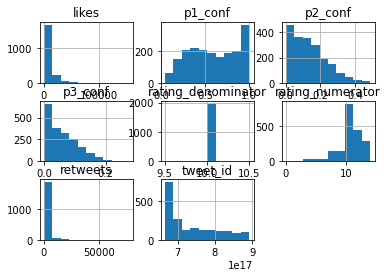

In [137]:
df.p1_dog = df.p1_dog.astype('str')
df.p2_dog = df.p2_dog.astype('str')
df.p3_dog = df.p3_dog.astype('str')

df.hist();

In [138]:
df.p1_dog = df.p1_dog.astype('bool')
df.p2_dog = df.p2_dog.astype('bool')
df.p3_dog = df.p3_dog.astype('bool')

## Insights

### 1. What is the average dog rating for the cleaned data and how many tweets does each dog rating have?

In [139]:
df.rating_numerator.mean()

10.537480877103519

### Insight #1 Visualization

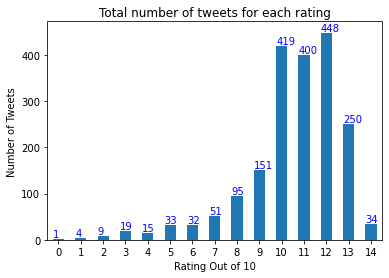

In [140]:
rating_count = df.groupby('rating_numerator').rating_numerator.count()

fig, ax = plt.subplots()
rating_count.plot(kind ='bar', title='Total number of tweets for each rating')
plt.xlabel('Rating Out of 10')
plt.ylabel('Number of Tweets')

for x, y in enumerate(rating_count):
    ax.text(x - .25, y + 4, str(y), color='blue')

ax.spines["top"].set_position(("outward", 1))


plt.show()

### 2. How many ratings were below 5 or above 10 and what percent of the total data do they represent?

In [141]:
df.query("rating_numerator < 5 or rating_numerator > 10").rating_numerator.count()

1180

In [142]:
df.query("rating_numerator < 5 or rating_numerator > 10").rating_numerator.count()/df.rating_numerator.count()

0.6017338092809791

### 3. How often does image prediction number 1 correctly predict that it is a dog in the photo and is that dog correct?

In [143]:
dog_prediction_true = df.groupby('p1_dog')['p1_conf'].mean()
dog_prediction_true.head(2)

p1_dog
True    0.594071
Name: p1_conf, dtype: float64

### 4. How many tweets receive dog_stage terminology and what percentage of the total tweets do they represent?

In [144]:
df.dog_stage.count()

302

In [145]:
df.dog_stage.count()/df.tweet_id.count()

0.15400305966343703

### 5. What is the most popular dog stage term?

In [146]:
df.dog_stage.value_counts()

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### 6. Do higher dog ratings use more dog stage terminology in the tweets?

In [147]:
#https://realpython.com/pandas-groupby/
dog_stage_rating = df.groupby('rating_numerator')['dog_stage'].count()
dog_stage_rating.head(18)

rating_numerator
0      0
1      0
2      0
3      1
4      0
5      2
6      1
7      8
8     15
9     17
10    57
11    70
12    72
13    44
14    15
Name: dog_stage, dtype: int64

### Insight #6 Visualization

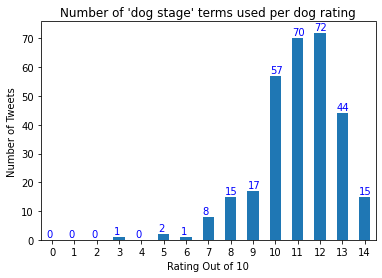

In [148]:
fig, ax = plt.subplots()

dog_stage_rating.plot(kind ='bar', title="Number of 'dog stage' terms used per dog rating")


for x, y in enumerate(dog_stage_rating):
    ax.text(x-.25, y +1, str(y), color='blue')

ax.spines["top"].set_position(("outward", 1))

plt.xlabel('Rating Out of 10')
plt.ylabel('Number of Tweets')
plt.show()